In [113]:
#Dependencies and api_keys
import requests
from pprint import pprint
from config import census_key
import json
import pandas as pd
from matplotlib import pyplot as plt

In [114]:
census_original_df = pd.read_csv("./census_output.csv")
census_original_df = census_original_df.drop("Unnamed: 0",axis=1)
census_original_df.head()

,County,Origin,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2012POP1YR,2013IN,2013NET,2013POP1YR,2014IN,2014NET,2014POP1YR,2015IN,2015NET,2015POP1YR
0,"Autauga County, Alabama",Asia,32.0,NaN,48877,1,1,NaN,NaN,NaN,...,54197,21,NaN,54567,39,NaN,54712,42,NaN,54662
1,"Autauga County, Alabama",Europe,37.0,NaN,48877,1,1,NaN,NaN,NaN,...,54197,51,NaN,54567,44,NaN,54712,55,NaN,54662
2,"Autauga County, Alabama","Baldwin County, Alabama",35.0,28.0,48877,1,1,NaN,NaN,NaN,...,54197,116,54.0,54567,77,-11.0,54712,54,-76.0,54662
3,"Autauga County, Alabama","Barbour County, Alabama",0.0,-18.0,48877,1,1,NaN,NaN,NaN,...,54197,4,-6.0,54567,4,4.0,54712,6,6.0,54662
4,"Autauga County, Alabama","Bibb County, Alabama",38.0,38.0,48877,1,1,NaN,NaN,NaN,...,54197,0,-118.0,54567,0,-141.0,54712,0,-149.0,54662


In [ ]:

census_df = census_original_df["County"].replace(regex=True,to_replace=['Parish','Municipal', 'Borough'],value='County')
census_df = census_df.reset_index()
census_df = census_original_df.groupby(census_original_df["County"]).sum()
census_df.head()

In [ ]:
county_lookup = pd.read_csv("./quandl_convert.csv")
county_lookup = county_lookup.rename(columns={"FULL1_NAME":"County","County":"County Code"})
county_lookup.head()

In [107]:
county_merge = census_df.merge(county_lookup,on="County")

In [108]:
zil_output = pd.read_csv('./zillow_calc.csv')
zil_output = zil_output.drop("Unnamed: 0",axis=1)
zil_output = zil_output.rename(columns={"County":"County Code"})
zil_output
zil_census_merge = county_merge.merge(zil_output,on="County Code")
zil_census_merge

,County,2009IN,2009NET,state,county,2010IN,2010NET,2011IN,2011NET,2012IN,...,2014 Difference,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change
0,"Acadia County, Louisiana",2082.0,-862.0,660,30,2129.0,-45.0,1996.0,-572.0,1949,...,2800.0,2800,2100.0,7.008086,-6.675063,0.269906,9.555855,3.439803,3.325416,2.413793
1,"Ada County, Idaho",26673.0,4034.0,3136,196,25963.0,3388.0,22795.0,1299.0,23941,...,7800.0,14500,24400.0,-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008
2,"Adair County, Missouri",2389.0,643.0,1537,53,2245.0,547.0,2602.0,826.0,2385,...,4000.0,5400,5400.0,-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417
3,"Adams County, Colorado",36313.0,5386.0,1336,167,36404.0,4927.0,36864.0,3041.0,37394,...,27100.0,35500,31700.0,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462
4,"Adams County, Idaho",190.0,-97.0,112,21,192.0,-8.0,237.0,123.0,271,...,8600.0,11600,38300.0,-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569
5,"Adams County, Illinois",1904.0,-65.0,833,49,1622.0,-392.0,1577.0,-349.0,1507,...,2600.0,3100,1300.0,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459
6,"Adams County, Indiana",605.0,-377.0,288,16,552.0,-449.0,542.0,-432.0,483,...,3800.0,3100,5400.0,-0.597015,0.000000,0.200200,0.099900,3.792415,2.980769,5.042017
7,"Adams County, Mississippi",796.0,-257.0,672,24,605.0,-500.0,433.0,-429.0,490,...,3000.0,3100,25900.0,1.527615,-1.736111,2.709069,-1.490826,3.492433,3.487064,28.152174
8,"Adams County, North Dakota",143.0,-11.0,342,9,143.0,-39.0,113.0,-25.0,114,...,0.0,0,3500.0,NaN,NaN,-0.120627,0.000000,0.000000,0.000000,4.227053
9,"Adams County, Ohio",783.0,-351.0,741,19,688.0,-286.0,732.0,-185.0,651,...,2600.0,6500,-400.0,10.726073,7.451565,-8.460472,-4.393939,4.120444,9.893455,-0.554017


In [111]:
zil_census_merge.to_csv('./zillow_census_m_OUTPUT.csv')

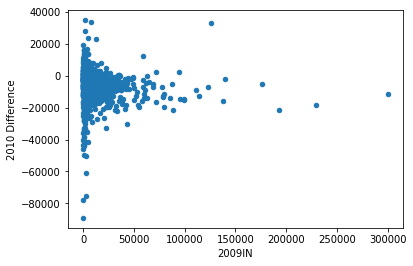

In [110]:
zil_census_merge.plot.scatter("2009IN","2010 Difference" , s=None, c=None)
plt.show()